# Ev analysis of plrnn


In [1]:
using Revise

using BPTT
using Flux
using NPZ
using LinearAlgebra
using BSON: @load
load_model

load_model (generic function with 1 method)

In [2]:
function gen_path(exp::String, name::String, run::Int, epoch::Int; eval=true)::BPTT.AbstractPLRNN
    load_path = joinpath(["Results", exp, name, format_run_ID(run)])
    if eval
        load_path = "../" * load_path
    end
    return joinpath(load_path, "checkpoints", "model_$epoch.bson")
end
function format_run_ID(run::Int)::String
    run_str = string(run)
    n_digits = length(run_str)
    @assert n_digits < 4
    add_zeros = 3 - n_digits
    return repeat("0", add_zeros) * run_str
end
function load_result_path(exp::String, epoch, run ;eval=true)
    run = format_run_ID(run)
    path = "Results/" * exp * "/evd/$run/checkpoints/" * "model_$epoch.bson"
    if eval
        path = "../"*path
    end
    return path
end


load_result_path (generic function with 1 method)

In [3]:

model_path = gen_path("default", "test", 1, 50)
m = load_model(model_path)

# compose single matrix AW
AW = diagm(m.A) + m.W;

# get evd of AW
EVD = eigen(AW);
λs = EVD.values;
V = EVD.vectors;


MethodError: MethodError: Cannot `convert` an object of type String to an object of type BPTT.AbstractPLRNN
Closest candidates are:
  convert(::Type{T}, !Matched::T) where T at /opt/julia-1.7.3/share/julia/base/essentials.jl:218

In [4]:
using Plots
scatter(imag(λs), label="imaginary")
scatter!(real(λs), label="real")

UndefVarError: UndefVarError: λs not defined

In [5]:
scatter(abs2.(λs))

UndefVarError: UndefVarError: λs not defined

# ev analasis for all models

In [6]:
# exp = lorenz_20...
# probably need to do it  by hand for bursting neuron
function remove!(a, item)
    deleteat!(a, findall(x -> x == item, a))
end

experiments = readdir("../Results")
remove!(experiments, "default")
deleteat!(experiments, 1:3)


3-element Vector{String}:
 "lorenz_20"
 "lorenz_22"
 "lorenz_24"

In [7]:
using BPTT
using Plots
for exp in experiments
    model_path = load_result_path(exp, 1000,1)
    m = BPTT.load_model(model_path)

    # compose single matrix AW
    AW = diagm(m.A) + m.W

    # get evd of AW
    EVD = eigen(AW)
    λs = EVD.values
    Vs = EVD.vectors
    try
        push!(exp_λs, λs)
        push!(exp_Vs, Vs)
    catch e
        global exp_λs = [λs]
        global exp_Vs = [Vs]
    end
end

function make_subplots(exp, plots, type)
    if exp == "lorenz"
        μ = "ρ"
        title = ["\n20" "ρ as bifurcation parameter\n22" "\n24" "\n25" "\n28" "\n34"]
    else
        μ = "\$g_{nmda}\$"
        title = ["\n2" "$μ as bifurcation parameter\n3" "\n5" "\n9" "\n10" "\n10.2"]
    end
    p = plot(plots..., layout=6,
        title=title, titlefont=font(11),
        legend=nothing,
        plot_title="$type of $exp plrnn", plot_titlevspan=0.08
    )
end


make_subplots (generic function with 1 method)

In [9]:
# Plots of single experiments
hists = (histogram(lambdas) for lambdas in exp_λs)
ims = (scatter(imag(lambdas)) for lambdas in exp_λs)
reals = (scatter(real(lambdas)) for lambdas in exp_λs)
abss = (scatter(abs.(lambdas)) for lambdas in exp_λs)


Base.Generator{Vector{Vector{ComplexF32}}, var"#21#22"}(var"#21#22"(), Vector{ComplexF32}[[-0.7459723f0 + 0.0f0im, 0.062021613f0 + 0.0f0im, 0.18844248f0 + 0.0f0im, 0.22967681f0 + 0.0f0im, 0.2843479f0 + 0.0f0im, 0.32507196f0 + 0.0f0im, 0.49685895f0 - 0.22189431f0im, 0.49685895f0 + 0.22189431f0im, 0.53839684f0 - 0.09887229f0im, 0.53839684f0 + 0.09887229f0im, 0.66958696f0 + 0.0f0im, 1.114702f0 - 0.584597f0im, 1.114702f0 + 0.584597f0im, 1.1800116f0 + 0.0f0im, 1.3574357f0 + 0.0f0im], [-0.14282635f0 - 0.15245569f0im, -0.14282635f0 + 0.15245569f0im, 0.15652315f0 + 0.0f0im, 0.16344139f0 - 0.17363863f0im, 0.16344139f0 + 0.17363863f0im, 0.21899417f0 + 0.0f0im, 0.43744597f0 + 0.0f0im, 0.4632393f0 + 0.0f0im, 0.5672475f0 - 0.30631253f0im, 0.5672475f0 + 0.30631253f0im, 0.5842352f0 + 0.0f0im, 0.72890645f0 + 0.0f0im, 1.0640448f0 + 0.0f0im, 1.2615663f0 + 0.0f0im, 1.5072728f0 + 0.0f0im], [0.008065852f0 + 0.0f0im, 0.103529945f0 + 0.0f0im, 0.121448115f0 + 0.0f0im, 0.16835411f0 - 0.51331097f0im, 0.16835411

Float32[0.2800465 0.010812536 0.2800465 0.010812536 0.2800465 0.010812536 0.2800465 0.010812536 0.2800465 0.010812536 0.2800465 0.010812536; 3.3682923 1.669256 3.3682923 1.669256 3.3682923 1.669256 3.3682923 1.669256 3.3682923 1.669256 3.3682923 1.669256; 0.830615 0.64448375 0.830615 0.64448375 0.830615 0.64448375 0.830615 0.64448375 0.830615 0.64448375 0.830615 0.64448375; 1.0382441 2.3520617 1.0382441 2.3520617 1.0382441 2.3520617 1.0382441 2.3520617 1.0382441 2.3520617 1.0382441 2.3520617; 0.8386227 1.899835 0.8386227 1.899835 0.8386227 1.899835 0.8386227 1.899835 0.8386227 1.899835 0.8386227 1.899835; 0.67367905 1.0551925 0.67367905 1.0551925 0.67367905 1.0551925 0.67367905 1.0551925 0.67367905 1.0551925 0.67367905 1.0551925; 0.8038979 0.7072471 0.8038979 0.7072471 0.8038979 0.7072471 0.8038979 0.7072471 0.8038979 0.7072471 0.8038979 0.7072471; 0.8512985 0.7072471 0.8512985 0.7072471 0.8512985 0.7072471 0.8512985 0.7072471 0.8512985 0.7072471 0.8512985 0.7072471; 1.1776911 1.004201

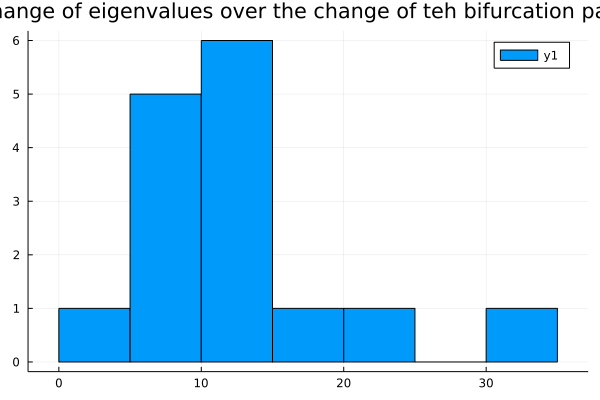

In [22]:
# look at change
abs_λ = [abs.(lambdas) for lambdas in exp_λs]

for id in 2:3#6 # for all experiments
    try
        push!(change_abs, abs_λ[id]./abs_λ[1])
    catch e
        global change_abs = [abs_λ[id]./abs_λ[1]]
    end
end
arr_change_abs = reduce(hcat, change_abs)
# hist of overall change
hist_abs = histogram(collect(Iterators.flatten(change_abs)), title="change of all eigenvalues", legend=nothing)

# hist of change of certain values
hist_lambda_abs = histogram(sum(arr_change_abs,dims=2),title="total change of eigenvalues over the change of teh bifurcation parameter")


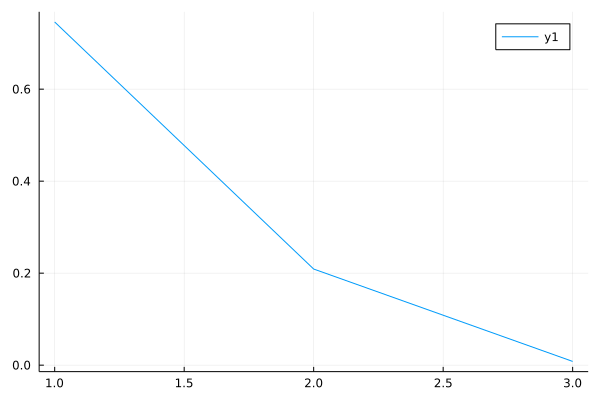

In [49]:
# plot the change of some of the imoprtant eigenvalues
val, idx = findmax(sum(arr_change_abs, dims=2))
arr_abs_λ = reduce(hcat, abs_λ)
plot(arr_abs_λ[idx[2],:])
